# Verifica Fila B

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/italia/covid19-opendata-vaccini/master/dati/punti-somministrazione-latest.csv')
df

,area,provincia,comune,presidio_ospedaliero,codice_NUTS1,codice_NUTS2,codice_regione_ISTAT,nome_area
0,ABR,CHIETI,CHIETI,PRESIDIO OSPEDALIERO SS ANNUNZIATA,ITF,ITF1,13,Abruzzo
1,ABR,CHIETI,LANCIANO,PRESIDIO OSPEDALIERO RENZETTI,ITF,ITF1,13,Abruzzo
2,ABR,CHIETI,VASTO,PRESIDIO OSPEDALIERO SAN PIO,ITF,ITF1,13,Abruzzo
3,ABR,L'AQUILA,AVEZZANO,P.O. SS. FILIPPO E NICOLA,ITF,ITF1,13,Abruzzo
4,ABR,L'AQUILA,L'AQUILA,PRESIDIO OSPEDALIERO SAN SALVATORE,ITF,ITF1,13,Abruzzo
...,...,...,...,...,...,...,...,...
288,VEN,ROVIGO,ROVIGO,"OSPEDALE ""SANTA MARIA DELLA MISERICORDIA""",ITH,ITH3,5,Veneto
289,VEN,TREVISO,VITTORIO VENETO,OSPEDALE DI VITTORIO VENETO,ITH,ITH3,5,Veneto
290,VEN,VENEZIA,VENEZIA MESTRE,OSPEDALE DELL'ANGELO,ITH,ITH3,5,Veneto
291,VEN,VERONA,VERONA,AZIENDA OSPEDALIERA UNIVERSITARIA INTEGRATA DI...,ITH,ITH3,5,Veneto


1. Eliminare tutte le colonne ad eccezione della provincia, del comune, del presidio ospedaliero e del nome_area

In [ ]:
df.drop(columns=['area', 'codice_NUTS1', 'codice_NUTS2', 'codice_regione_ISTAT'], inplace=True)
df

,provincia,comune,presidio_ospedaliero,nome_area
0,CHIETI,CHIETI,PRESIDIO OSPEDALIERO SS ANNUNZIATA,Abruzzo
1,CHIETI,LANCIANO,PRESIDIO OSPEDALIERO RENZETTI,Abruzzo
2,CHIETI,VASTO,PRESIDIO OSPEDALIERO SAN PIO,Abruzzo
3,L'AQUILA,AVEZZANO,P.O. SS. FILIPPO E NICOLA,Abruzzo
4,L'AQUILA,L'AQUILA,PRESIDIO OSPEDALIERO SAN SALVATORE,Abruzzo
...,...,...,...,...
288,ROVIGO,ROVIGO,"OSPEDALE ""SANTA MARIA DELLA MISERICORDIA""",Veneto
289,TREVISO,VITTORIO VENETO,OSPEDALE DI VITTORIO VENETO,Veneto
290,VENEZIA,VENEZIA MESTRE,OSPEDALE DELL'ANGELO,Veneto
291,VERONA,VERONA,AZIENDA OSPEDALIERA UNIVERSITARIA INTEGRATA DI...,Veneto


2. Eliminare i dati nulli

In [ ]:
df.dropna(inplace=True)
df

,provincia,comune,presidio_ospedaliero,nome_area
0,CHIETI,CHIETI,PRESIDIO OSPEDALIERO SS ANNUNZIATA,Abruzzo
1,CHIETI,LANCIANO,PRESIDIO OSPEDALIERO RENZETTI,Abruzzo
2,CHIETI,VASTO,PRESIDIO OSPEDALIERO SAN PIO,Abruzzo
3,L'AQUILA,AVEZZANO,P.O. SS. FILIPPO E NICOLA,Abruzzo
4,L'AQUILA,L'AQUILA,PRESIDIO OSPEDALIERO SAN SALVATORE,Abruzzo
...,...,...,...,...
288,ROVIGO,ROVIGO,"OSPEDALE ""SANTA MARIA DELLA MISERICORDIA""",Veneto
289,TREVISO,VITTORIO VENETO,OSPEDALE DI VITTORIO VENETO,Veneto
290,VENEZIA,VENEZIA MESTRE,OSPEDALE DELL'ANGELO,Veneto
291,VERONA,VERONA,AZIENDA OSPEDALIERA UNIVERSITARIA INTEGRATA DI...,Veneto


3.Visualizzare i punti vaccinali di un comune inserito dall’utente. Controllare il dato inserito: se il comune non esiste dare un opportuno messaggio, altrimenti visualizzare i nomi dei punti vaccinali

In [ ]:
comune = input('inserire comune')

if comune in df['comune'].tolist():
  print(df.loc[df["comune"]==comune,"presidio_ospedaliero"])
else:
  print('comune non presente')

inserire comuneAVELLINO
19    A.O.R.N. MOSCATI
Name: presidio_ospedaliero, dtype: object


4. Visualizzare il numero di punti vaccinali di ogni regione. Visualizzare il nome della regione e il numero di punti vaccinali. Ordinare in ordine decrescente sul numero di punti vaccinali (dalla regione che ha più punti vaccinali a quella che ne ha di meno)

In [ ]:
df1 = df.groupby('nome_area')['presidio_ospedaliero'].count().sort_values(ascending=False)
df1

nome_area
Lombardia                             65
Sicilia                               33
Piemonte                              28
Campania                              27
Lazio                                 20
Liguria                               14
Emilia-Romagna                        13
Toscana                               12
Sardegna                              12
Puglia                                11
Veneto                                 7
Abruzzo                                7
Marche                                 7
Provincia Autonoma Bolzano / Bozen     7
Calabria                               6
Friuli-Venezia Giulia                  5
Basilicata                             5
Umbria                                 4
Provincia Autonoma Trento              3
Valle d'Aosta / Vallée d'Aoste         2
Molise                                 2
Name: presidio_ospedaliero, dtype: int64

5. Visualizzare il grafico a barre orizzontali relativo all’esercizio 4. Inserire il titolo, i nomi degli assi e la legenda. Fare in modo che i colori delle barre siano gradazioni dello stesso colore.

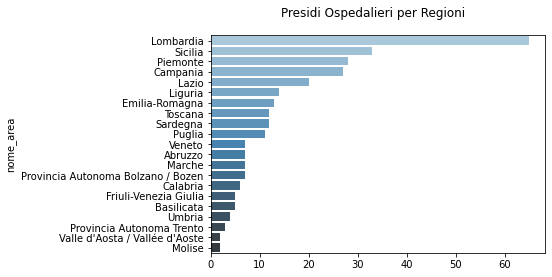

In [ ]:
import seaborn as sns
fig = plt.figure()
sns.barplot(x= df1.values, y= df1.index, palette='Blues_d')

fig.suptitle('Presidi Ospedalieri per Regioni')
ax.set_xlabel('Numero Presidi Ospedalieri')
ax.set_ylabel('Regioni')
ax.legend()
plt.show()

6. Visualizzare il numero di province per ogni regione

In [ ]:
df3 = df.pivot_table(columns=['nome_area','provincia'], aggfunc='size').reset_index()
dfpro= df3.groupby('nome_area')['provincia'].count()
dfpro

nome_area
Abruzzo                                4
Basilicata                             2
Calabria                               5
Campania                               5
Emilia-Romagna                         9
Friuli-Venezia Giulia                  4
Lazio                                  6
Liguria                                5
Lombardia                             12
Marche                                 5
Molise                                 1
Piemonte                               8
Provincia Autonoma Bolzano / Bozen     1
Provincia Autonoma Trento              1
Puglia                                 6
Sardegna                               8
Sicilia                                9
Toscana                               10
Umbria                                 2
Valle d'Aosta / Vallée d'Aoste         1
Veneto                                 7
Name: provincia, dtype: int64

7. Visualizzare il grafico a torta dei dati dell’esercizio precedente. Inserire il titolo e la legenda

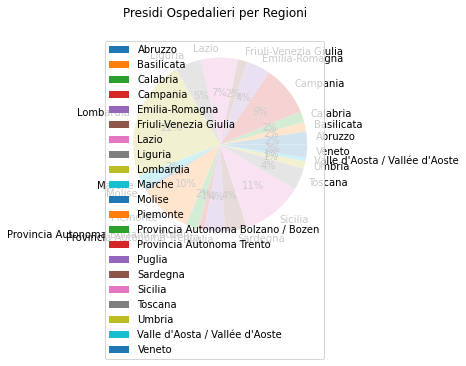

In [ ]:
fig = plt.figure()
ax = plt.axes()
ax.pie(dfpro.values, labels=dfpro.index, autopct='%1.0f%%')
fig.suptitle('Presidi Ospedalieri per Regioni')
ax.legend(dfpro.index)
plt.show()

8. Visualizzare un nuovo grafico con i grafici precedenti. Il nuovo grafico deve avere due righe e tre colonne e deve contenere nella prima riga tre volte il grafico a barre e nella seconda riga tre volte il grafico a torta

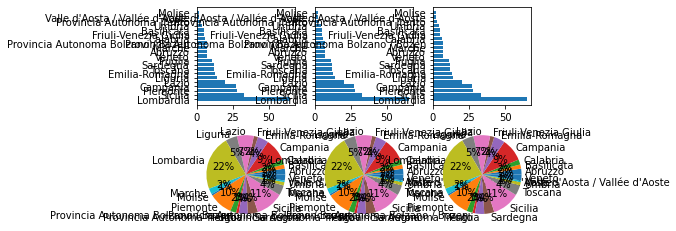

In [ ]:
fig, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(2,3)
ax1.barh(df1.index, df1.values, label='Presidi Ospedalieri per Regioni')
ax2.barh(df1.index, df1.values, label='Presidi Ospedalieri per Regioni')
ax3.barh(df1.index, df1.values, label='Presidi Ospedalieri per Regioni')

ax4.pie(dfpro.values, labels=dfpro.index, autopct='%1.0f%%')
ax5.pie(dfpro.values, labels=dfpro.index, autopct='%1.0f%%')
ax6.pie(dfpro.values, labels=dfpro.index, autopct='%1.0f%%')
plt.show()

9. Salvare il grafico in un file .png

In [ ]:
fig.savefig("output.png")